In [31]:
#Data Load
import pandas as pd
train_dataset= pd.read_csv("./data/train.csv")
test_dataset= pd.read_csv("./data/test.csv")

In [2]:
#check Train Set #row 5개만 보여주기
train_dataset.head()

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2


In [3]:
test_dataset.head()

,id,letter,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,...,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,...,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,...,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,...,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,...,4,3,1,4,0,2,1,2,3,4


In [4]:
#Split to Image & letter & digit
train_images=(train_dataset.iloc[:,3:].values).astype("float32")
train_digit=train_dataset["digit"].values
train_letter=train_dataset["letter"].values

test_images=(test_dataset.values[:,2:]).astype("float32")
test_letter=test_dataset["letter"].values

In [5]:
train_images[0].shape

(784,)

In [6]:
test_images[0].shape

(784,)

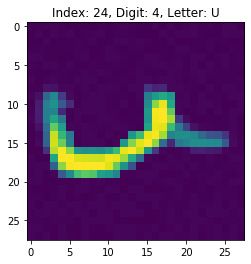

In [9]:
import matplotlib.pyplot as plt
idx = 24
img = train_dataset.loc[idx, '0':].values.reshape(28, 28).astype(int)
digit = train_dataset.loc[idx, 'digit']
letter = train_dataset.loc[idx, 'letter']

plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
plt.imshow(img)
plt.show()

In [19]:
import numpy as np
x_train = train_dataset.drop(['id', 'digit', 'letter'], axis=1).values
x_train = x_train.reshape(-1, 28, 28, 1)
x_train = x_train/255 #normalize

y = train_dataset['digit']
y_train = np.zeros((len(y), len(y.unique())))
for i, digit in enumerate(y):
    y_train[i, digit] = 1

In [20]:
#CNN 모델 구축
import tensorflow as tf
def create_cnn_model(x_train):
    inputs = tf.keras.layers.Input(x_train.shape[1:])

    bn = tf.keras.layers.BatchNormalization()(inputs)
    conv = tf.keras.layers.Conv2D(128, kernel_size=5, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(128, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)

    bn = tf.keras.layers.BatchNormalization()(pool)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)

    flatten = tf.keras.layers.Flatten()(pool)

    bn = tf.keras.layers.BatchNormalization()(flatten)
    dense = tf.keras.layers.Dense(1000, activation='relu')(bn)

    bn = tf.keras.layers.BatchNormalization()(dense)
    outputs = tf.keras.layers.Dense(10, activation='softmax')(bn)

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

    return model

In [21]:
model = create_cnn_model(x_train)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
2048/2048 [==============================] - 48s 23ms/sample - loss: 2.4951 - acc: 0.4575
Epoch 2/20
2048/2048 [==============================] - 47s 23ms/sample - loss: 0.8876 - acc: 0.7212
Epoch 3/20
2048/2048 [==============================] - 48s 23ms/sample - loss: 0.4709 - acc: 0.8350
Epoch 4/20
2048/2048 [==============================] - 48s 24ms/sample - loss: 0.2687 - acc: 0.9053
Epoch 5/20
2048/2048 [==============================] - 50s 24ms/sample - loss: 0.1995 - acc: 0.9370
Epoch 6/20
2048/2048 [==============================] - 49s 24ms/sample - loss: 0.1503 - acc: 0.9517
Epoch 7/20
2048/2048 [==============================] - 53s 26ms/sample - loss: 0.1369 - acc: 0.9526
Epoch 8/20
2048/2048 [==============================] - 51s 25ms/sample - loss: 0.0804 - acc: 0.9756
Epoch 9/20
2048/2048 [==============================] - 50s 24ms/sample - loss: 0.0487 - acc: 0.9849
Epoch 10/20
2048/2048 [==============================] - 51s 25ms/sample - loss: 0.0443 - a

In [28]:
x_test = test_dataset.drop(['id', 'letter'], axis=1).values
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test/255

submission = pd.read_csv('./data/submission.csv')
submission['digit'] = np.argmax(model.predict(x_test), axis=1)
submission.head()

          id  digit
0       2049      0
1       2050      0
2       2051      0
3       2052      0
4       2053      0
...      ...    ...
20475  22524      0
20476  22525      0
20477  22526      0
20478  22527      0
20479  22528      0

[20480 rows x 2 columns]


,id,digit
0,2049,6
1,2050,5
2,2051,6
3,2052,0
4,2053,3


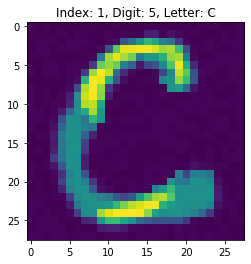

In [37]:
#submission.to_csv('baseline.csv', index=False) #submission csv에 업로드 후 제출
idx = 1
img = test_dataset.loc[idx, '0':].values.reshape(28, 28).astype(int)
digit = submission.loc[idx, 'digit']
letter = test_letter[idx]

plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
plt.imshow(img)
plt.show()